In [ ]:
from google.colab import files
uploaded = files.upload() # Select and upload files



Saving P1.0.csv to P1.0.csv
Saving P2.0.csv to P2.0.csv
Saving P3.0.csv to P3.0.csv
Saving P4.0.csv to P4.0.csv
Saving P6.0.csv to P6.0.csv
Saving P7.0.csv to P7.0.csv
Saving P16.0.csv to P16.0.csv
Saving P20.0.csv to P20.0.csv
Saving P21.0.csv to P21.0.csv
Saving P25.0.csv to P25.0.csv
Saving P29.0.csv to P29.0.csv
Saving P30.0.csv to P30.0.csv
Saving P32.0.csv to P32.0.csv
Saving P38.0.csv to P38.0.csv
Saving P45.0.csv to P45.0.csv
Saving P47.0.csv to P47.0.csv
Saving P58.0.csv to P58.0.csv
Saving P63.0.csv to P63.0.csv
Saving P81.0.csv to P81.0.csv
Saving P88.0.csv to P88.0.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select and upload files


Saving Set_up_for_performing.py to Set_up_for_performing.py


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from Set_up_for_performing import  perform_model, print_grid_search_attributes, plot_confusion_matrix

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import glob

# Define all expected labels
all_labels = {
    'walking', 'sitting', 'standing', 'standing_hosehold_chores',
    'lying', 'cycling', 'vacuum_cleaning', 'walkingStairsUp', 'jumping'
}

# Scan each file
user_label_coverage = {}

for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    labels = set(df['label'].unique())
    user = file.split('.')[0].upper()

    user_label_coverage[user] = labels
    print(f"{user}: {labels}")

# Identify users with full label coverage
print("\nUsers with full label coverage:")
for user, labels in user_label_coverage.items():
    if all_labels.issubset(labels):
        print(f"- {user}")

# Optionally: users missing labels
print("\nUsers missing any labels:")
for user, labels in user_label_coverage.items():
    missing = all_labels - labels
    if missing:
        print(f"{user} is missing: {missing}")


P3: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P88: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P45: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P21: {'standing_hosehold_chores', 'cycling', 'lying', 'sitting', 'standing', 'walking'}
P81: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P16: {'walking', 'sitting', 'standing'}
P47: {'standing_hosehold_chores', 'cycling', 'sitting', 'standing', 'walking'}
P2: {'standing_hosehold_chores', 'cycling', 'lying', 'sitting', 'standing', 'walking'}
P58: {'standing_hosehold_chores', 'cycling', 'lying', 'sitting', 'standing', 'walking'}
P63: {'standing_hosehold_chores', 'cycling', 'sitting', 'standing', 'walking'}
P7: {'standing_hosehold_chores', 'cycling', 'sitting', 'standing', 'walking'}
P1: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P38: {'standing_hosehold_chores', 'lying', 'sitting', 'standing', 'walking'}
P

In [ ]:
import pandas as pd
import glob

# Define test users
test_users = {'P7', 'P2', 'P1', 'P16'}

# Define keywords to identify PAMAP files
pamap_keywords = {'pamap', 'PAMAP'}

# Get all CSV files 
csv_files = glob.glob("*.csv")
print(f"Total CSV files found: {len(csv_files)}")

# Prepare lists for train/test 

train_dfs = []
test_dfs = []

# Process files 
for file in csv_files:
    filename_upper = file.upper()

    # Skip PAMAP files
    if any(keyword in filename_upper for keyword in pamap_keywords):
        print(f"Skipping PAMAP file: {file}")
        continue

    user_id = file.split('.')[0].upper()

    if user_id in test_users:
        print(f"Test: {file}")
        test_dfs.append(pd.read_csv(file))
    else:
        print(f"Train: {file}")
        train_dfs.append(pd.read_csv(file))

#  Error checks 
if not train_dfs:
    raise ValueError("No training files loaded!")
if not test_dfs:
    raise ValueError("No testing files loaded!")

# Combine dataframes 
train_data = pd.concat(train_dfs, ignore_index=True)
test_data = pd.concat(test_dfs, ignore_index=True)

# Verify shapes 
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Total CSV files found: 20
Train: P3.0.csv
Train: P88.0.csv
Train: P45.0.csv
Train: P21.0.csv
Train: P81.0.csv
Test: P16.0.csv
Train: P47.0.csv
Test: P2.0.csv
Train: P58.0.csv
Train: P63.0.csv
Test: P7.0.csv
Test: P1.0.csv
Train: P38.0.csv
Train: P25.0.csv
Train: P6.0.csv
Train: P30.0.csv
Train: P29.0.csv
Train: P32.0.csv
Train: P20.0.csv
Train: P4.0.csv
Train shape: (131567, 42)
Test shape: (31669, 42)


In [ ]:
# Drop 'walkingStairsUp' from both train and test
train_data = train_data[train_data['label'] != 'walkingStairsUp']
test_data = test_data[test_data['label'] != 'walkingStairsUp']

# Verify updated label counts 
print("\nLabel counts in updated train set:\n", train_data['label'].value_counts())
print("\nLabel counts in updated test set:\n", test_data['label'].value_counts())



Label counts in updated train set:
 label
sitting                     26661
walking                     26661
standing                    25651
standing_hosehold_chores    23367
lying                       19994
cycling                      8741
Name: count, dtype: int64

Label counts in updated test set:
 label
sitting                     6667
standing                    6667
walking                     6667
standing_hosehold_chores    5000
cycling                     3334
lying                       3334
Name: count, dtype: int64


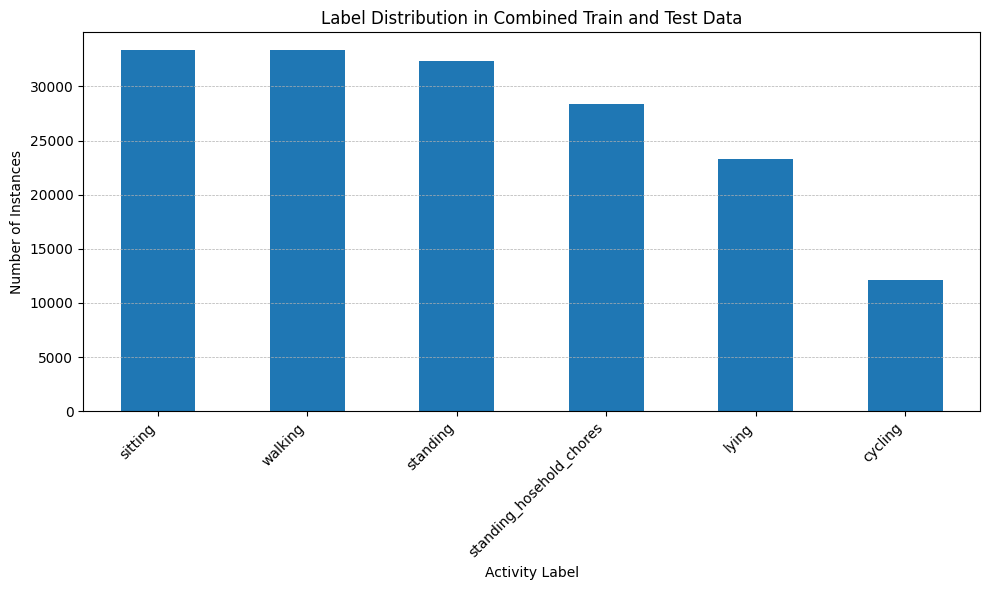

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Combine datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Count label occurrences
label_counts = combined_data['label'].value_counts().sort_values(ascending=False)

# Plot the label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution in Combined Train and Test Data')
plt.xlabel('Activity Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
print("train2 shape:", train_data.shape)
print("Unique labels in train_2:", train_data['label'].unique())

train2 shape: (131075, 42)
Unique labels in train_2: ['lying' 'sitting' 'standing' 'standing_hosehold_chores' 'walking'
 'cycling']


In [ ]:
print("train2 shape:", test_data.shape)
print("Unique labels in train_2:", test_data['label'].unique())

train2 shape: (31669, 42)
Unique labels in train_2: ['sitting' 'standing' 'walking' 'cycling' 'lying'
 'standing_hosehold_chores']


In [ ]:
print("Original label counts in train:\n", train_data['label'].value_counts())
print("\nOriginal label counts in test:\n", test_data['label'].value_counts())


Original label counts in train:
 label
sitting                     26661
walking                     26661
standing                    25651
standing_hosehold_chores    23367
lying                       19994
cycling                      8741
Name: count, dtype: int64

Original label counts in test:
 label
sitting                     6667
standing                    6667
walking                     6667
standing_hosehold_chores    5000
cycling                     3334
lying                       3334
Name: count, dtype: int64


In [ ]:
train = train_data

In [ ]:
test = test_data

In [ ]:
# get X_train and y_train from csv files
X_train = train.drop(['user_id', 'label'], axis=1)
y_train = train.label

In [ ]:

# get X_test and y_test from test csv file
X_test = train.drop(['user_id', 'label'], axis=1)
y_test = test.label

In [ ]:
# Separate features and labels for training data
X_train = train.drop(columns=['label'])  # Drop the label column to get features
y_train = train['label']  # Select only the label column for targets

# Separate features and labels for testing data
X_test = test.drop(columns=['label'])  # Drop the label column to get features
y_test = test['label']  # Select only the label column for targets

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (131075, 41)
y_train shape: (131075,)
X_test shape: (31669, 41)
y_test shape: (31669,)


In [ ]:
# Check for NaNs in training and test sets
print("\nNaNs in X_train:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

print("\nNaNs in X_test:")
print(X_test.isna().sum()[X_test.isna().sum() > 0])



NaNs in X_train:
Ax_skewness     931
Ax_kurtosis     931
Ay_skewness    2541
Ay_kurtosis    2541
Az_skewness     299
Az_kurtosis     299
dtype: int64

NaNs in X_test:
Ax_skewness     20
Ax_kurtosis     20
Ay_skewness    224
Ay_kurtosis    224
Az_skewness     41
Az_kurtosis     41
dtype: int64


In [ ]:
# Drop rows with NaNs from both train and test sets
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Make sure y matches X

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [ ]:
label = train['label'].unique().tolist()


## 1. Logistic regression



Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done

Training time (HH:MM:SS.ms): 0:12:59.573343

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.021634

---------------------
|      Accuracy      |
---------------------

    0.8421136450503249

--------------------
| Confusion Matrix |
--------------------

 [[3330    3    1    0    0    0]
 [   0 2808  331    0    2    0]
 [   0  217 5915  391   76    0]
 [   0    1 1677 3908 1070    0]
 [   0    0   13 1175 3811    0]
 [   0    0    0    0    0 6667]]


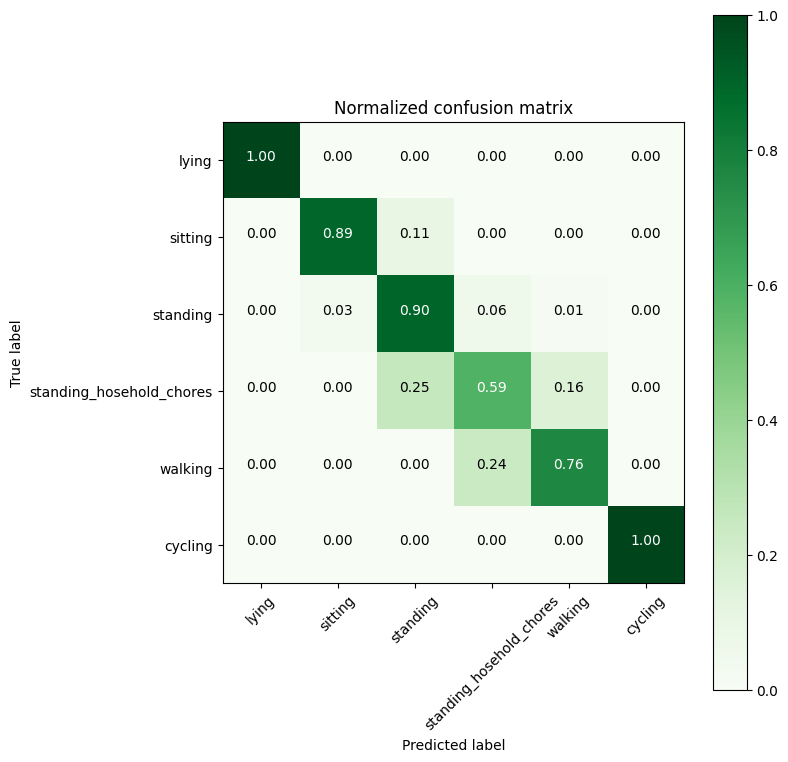

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                   lying       1.00      1.00      1.00      3334
                 sitting       0.93      0.89      0.91      3141
                standing       0.75      0.90      0.81      6599
standing_hosehold_chores       0.71      0.59      0.64      6656
                 walking       0.77      0.76      0.77      4999
                 cycling       1.00      1.00      1.00      6667

                accuracy                           0.84     31396
               macro avg       0.86      0.86      0.86     31396
            weighted avg       0.84      0.84      0.84     31396

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, penalty='l1', solver='liblinear')

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	

In [ ]:


# Set up Grid Search for Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=label)
print_grid_search_attributes(log_reg_grid)


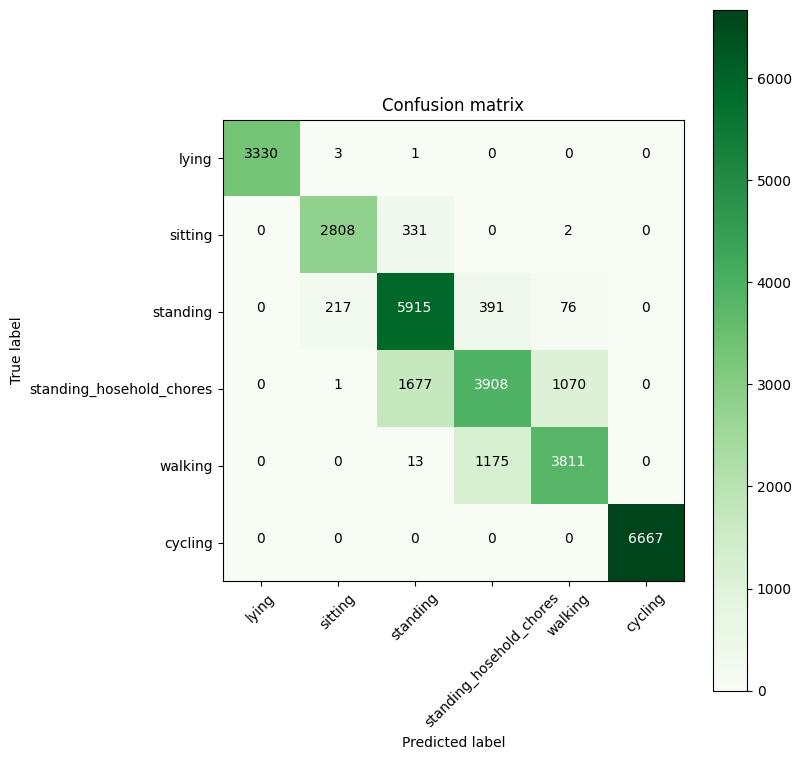

In [ ]:

plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()


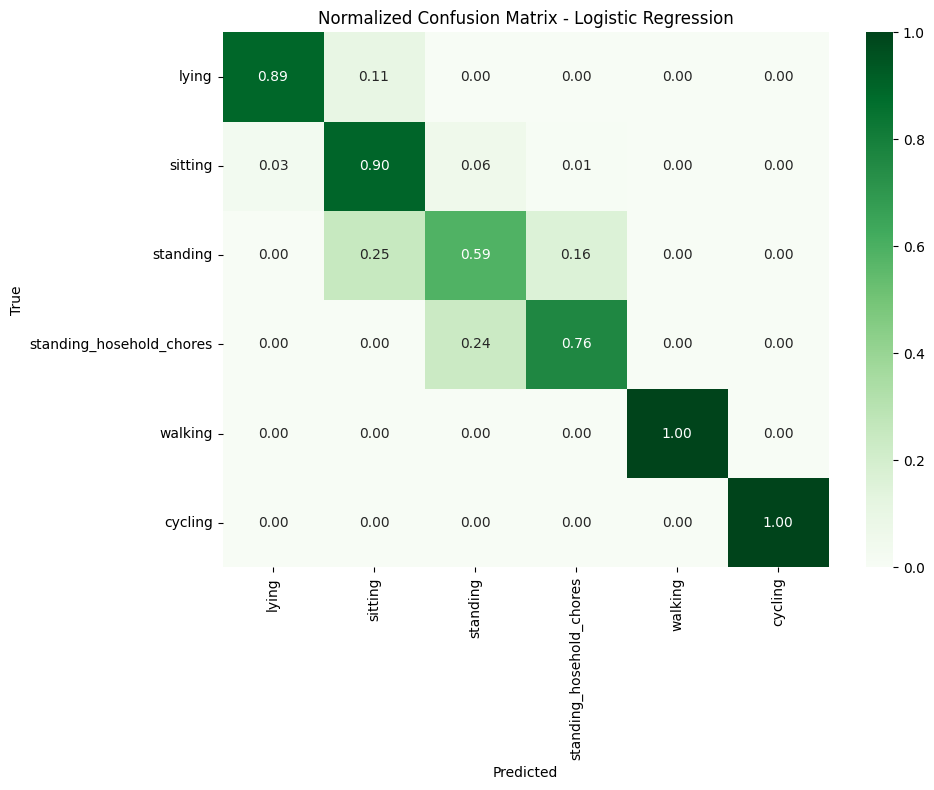

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred = log_reg_grid.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=label)

#  Normalize (row-wise) to get percentages 
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Greens', fmt='.2f',
            xticklabels=label, yticklabels=label)
plt.title("Normalized Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()

# Save 
plt.savefig("logreg_confusion_matrix_normalized.png", dpi=300)
plt.show()

# Optional: download from Colab
from google.colab import files
files.download("logreg_confusion_matrix_normalized.png")


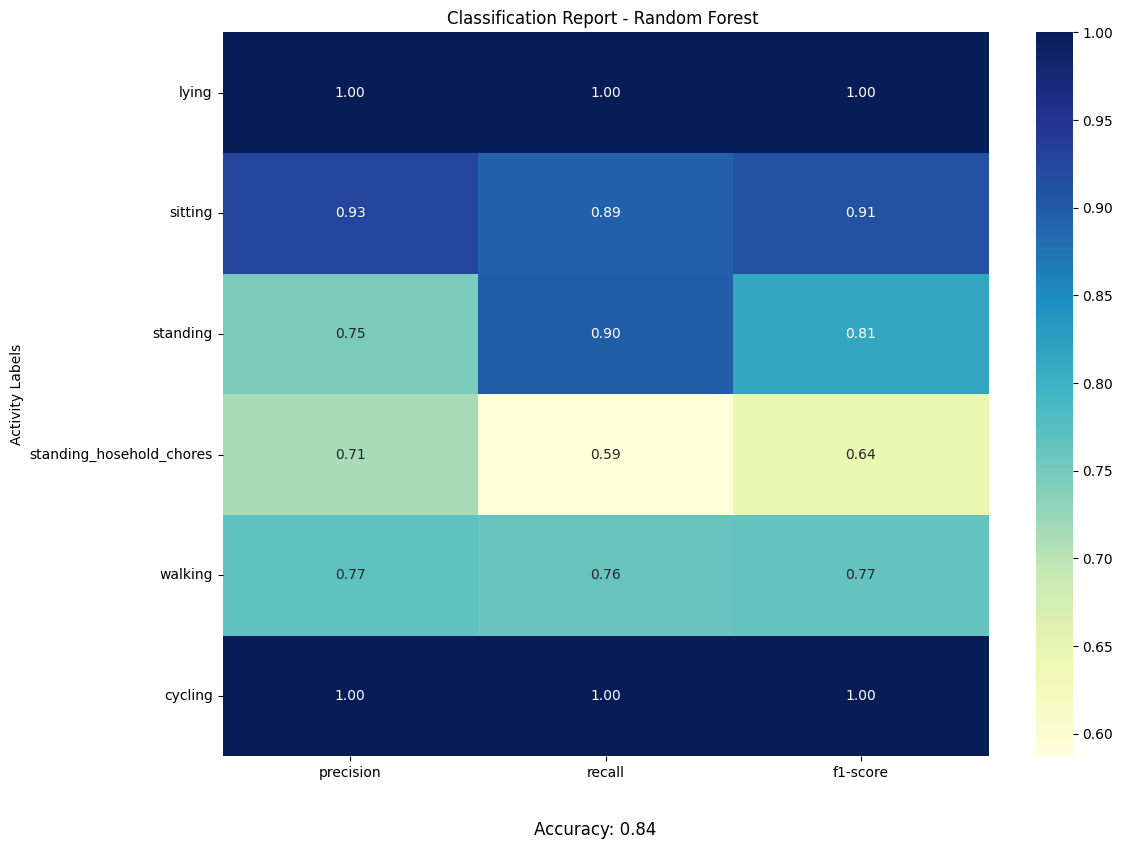

Accuracy: 0.8421


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predict with best estimator from grid search
best_rfc = log_reg_grid.best_estimator_
y_pred = best_rfc.predict(X_test)

# Generate classification report dictionary 
report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=label)

# Convert to DataFrame 
report_df = pd.DataFrame(report_dict).transpose()

report_df_classes = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Plot the heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(report_df_classes.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report - Random Forest ")
plt.ylabel("Activity Labels")
plt.yticks(rotation=0)

# Display accuracy on the figure
accuracy = report_dict["accuracy"]
plt.figtext(0.5, -0.05, f"Accuracy: {accuracy:.2f}", ha="center", fontsize=12)

plt.tight_layout()

# Save the figure as PNG
plt.savefig("log_classification_report.png", dpi=300, bbox_inches='tight')
plt.show()

# Also print accuracy in console 
print(f"Accuracy: {accuracy:.4f}")

# Download from Colab 
from google.colab import files
files.download("log_classification_report.png")


## 2. Random Forest Classifier

Training the model...
Done

Training time (HH:MM:SS.ms): 2:47:49.463867

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.403228

---------------------
|      Accuracy      |
---------------------

    0.7737928398522105

--------------------
| Confusion Matrix |
--------------------

 [[2949    0  316   69    0    0]
 [  35 1513 1593    0    0    0]
 [   0   18 6289  108  184    0]
 [   0    0 1419 5235    2    0]
 [   0    0    0 1691 3308    0]
 [   0    0    0    0 1667 5000]]


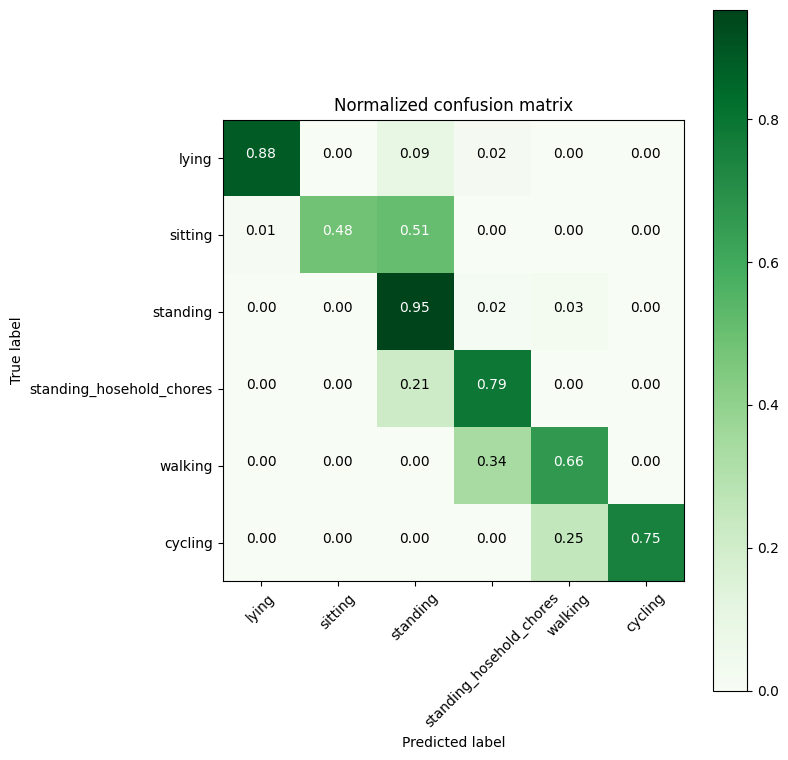

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                   lying       0.99      0.88      0.93      3334
                 sitting       0.99      0.48      0.65      3141
                standing       0.65      0.95      0.78      6599
standing_hosehold_chores       0.74      0.79      0.76      6656
                 walking       0.64      0.66      0.65      4999
                 cycling       1.00      0.75      0.86      6667

                accuracy                           0.77     31396
               macro avg       0.83      0.75      0.77     31396
            weighted avg       0.81      0.77      0.77     31396



In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=label)

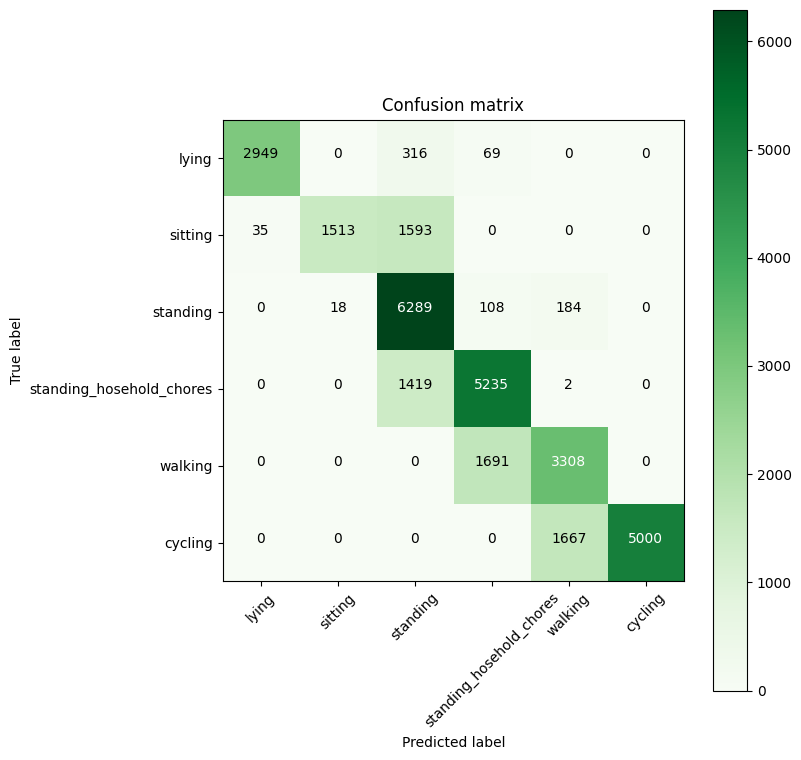

In [ ]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()

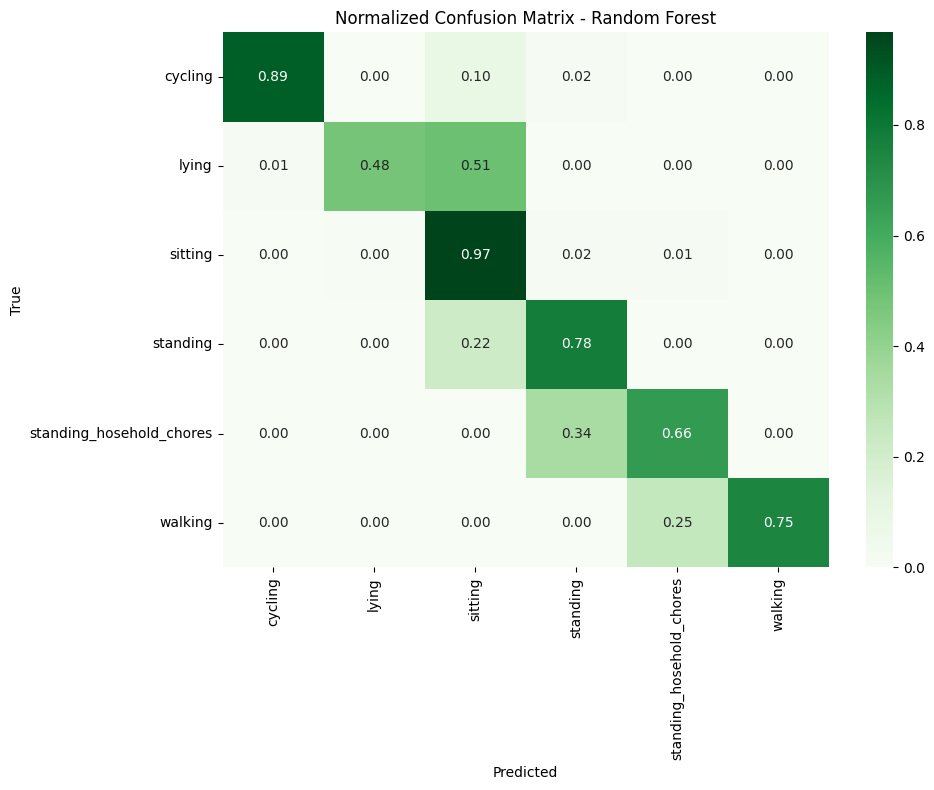

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred = rfc_grid.predict(X_test)
# Compute Confusion Matrix 
cm = confusion_matrix(y_test, y_pred, labels=label)

# Normalize (row-wise) to get percentages 
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Greens', fmt='.2f',
            xticklabels=label, yticklabels=label)
plt.title("Normalized Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()

# Save
plt.savefig("rfc_PAMAP_base.png", dpi=300)
plt.show()

# download from Colab
from google.colab import files
files.download("rfc_PAMAP_base.png")


In [ ]:
plt.savefig("rfc_Capture_base.png", dpi=300)
plt.show()

# Download from Colab ---
from google.colab import files
files.download("rfc_Capture_base.png")

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

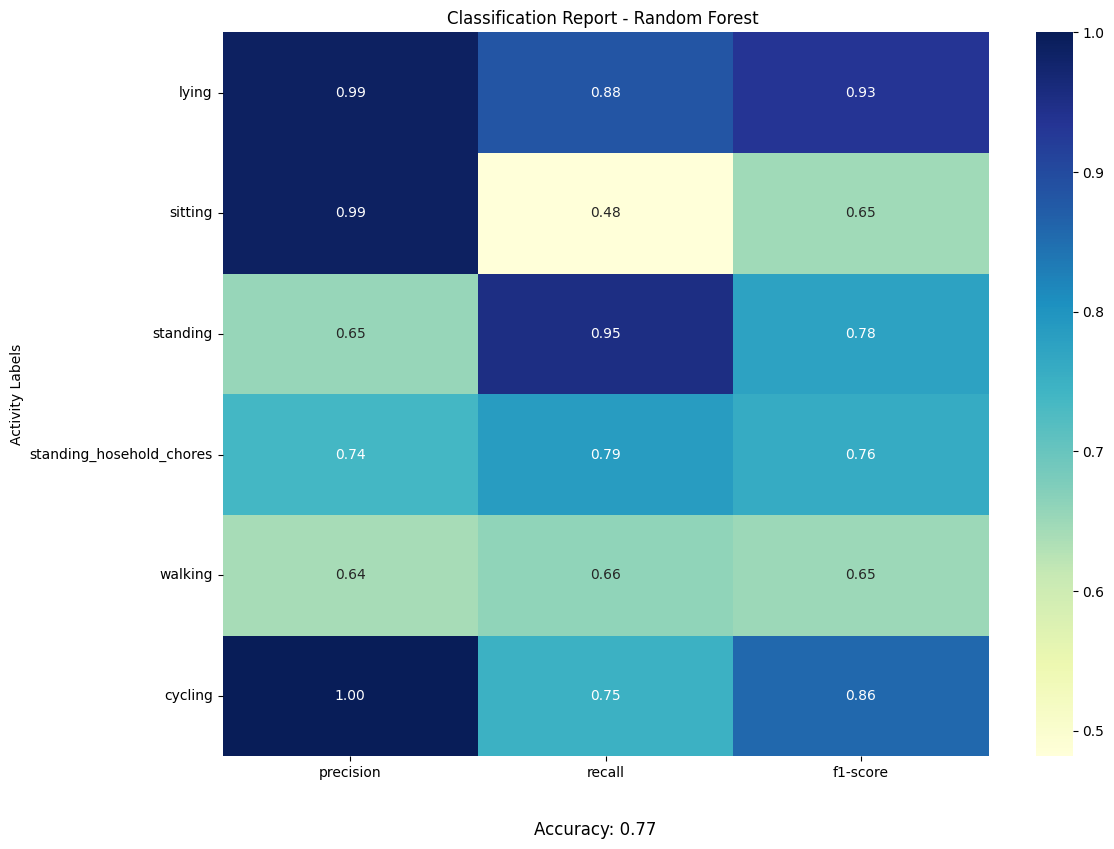

Accuracy: 0.7738


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predict with best estimator from grid search
best_rfc = rfc_grid.best_estimator_
y_pred = best_rfc.predict(X_test)

# Generate classification report dictionary 
report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=label)

#  Convert to DataFrame 
report_df = pd.DataFrame(report_dict).transpose()

report_df_classes = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Plot the heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(report_df_classes.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report - Random Forest ")
plt.ylabel("Activity Labels")
plt.yticks(rotation=0)

# Display accuracy on the figure 
accuracy = report_dict["accuracy"]
plt.figtext(0.5, -0.05, f"Accuracy: {accuracy:.2f}", ha="center", fontsize=12)

plt.tight_layout()

#  Save the figure as PNG 
plt.savefig("rfc_classification_report.png", dpi=300, bbox_inches='tight')
plt.show()

#  Also print accuracy in console 
print(f"Accuracy: {accuracy:.4f}")

# Download from Colab 
from google.colab import files
files.download("rfc_classification_report.png")


In [ ]:

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting    : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 83.73%      16.27%
Random Forest       : 77.55%       22.45% 
GradientBoosting    : 90.51%      9.488% 
